## Tesla (TSLA) Stock Price Prediction using Facebook Prophet


In [ ]:
# Switch to GPU mode faster computations
# Runtime > Change runtime type > T4 GPU

### Importing all the necessary libraries

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

### Importing the Dataset & Exploring it

In [ ]:
import yfinance as yf

df = yf.download("AMZN", period="1y", auto_adjust=False)

# flatten columns
df.columns = df.columns.get_level_values(0)

df.to_csv("AMZN.csv")



[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.read_csv("AMZN.csv")
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2025-01-03,224.190002,224.190002,225.360001,221.619995,222.509995,27515600
1,2025-01-06,227.610001,227.610001,228.839996,224.839996,226.779999,31849800
2,2025-01-07,222.110001,222.110001,228.380005,221.460007,227.899994,28084200
3,2025-01-08,222.130005,222.130005,223.520004,220.199997,223.190002,25033300
4,2025-01-10,218.940002,218.940002,221.710007,216.500000,221.460007,36811500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Adj Close  250 non-null    float64
 2   Close      250 non-null    float64
 3   High       250 non-null    float64
 4   Low        250 non-null    float64
 5   Open       250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,217.697920,217.697920,220.214600,215.136720,217.888040,4.450914e+07
std,17.104562,17.104562,16.787074,17.721893,17.506602,1.992099e+07
min,167.320007,167.320007,169.600006,161.380005,162.000000,1.142050e+07
25%,208.022503,208.022503,210.707500,205.067497,208.874996,3.242772e+07
50%,222.150002,222.150002,223.910004,220.184998,222.719994,3.941110e+07
75%,229.634998,229.634998,231.795002,227.797497,230.194996,5.017025e+07
max,254.000000,254.000000,258.600006,252.899994,255.360001,1.663408e+08


### Data Visualization using plotly express - Visualizing the historical performance of Tesla

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

### Data Preparation

In [ ]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2025-01-03,224.190002,224.190002,225.360001,221.619995,222.509995,27515600
1,2025-01-06,227.610001,227.610001,228.839996,224.839996,226.779999,31849800
2,2025-01-07,222.110001,222.110001,228.380005,221.460007,227.899994,28084200
3,2025-01-08,222.130005,222.130005,223.520004,220.199997,223.190002,25033300
4,2025-01-10,218.940002,218.940002,221.710007,216.500000,221.460007,36811500
...,...,...,...,...,...,...,...
245,2025-12-26,232.520004,232.520004,232.990005,231.179993,232.039993,15994700
246,2025-12-29,232.070007,232.070007,232.600006,230.770004,231.940002,19797900
247,2025-12-30,232.529999,232.529999,232.770004,230.199997,231.210007,21910500
248,2025-12-31,230.820007,230.820007,232.990005,230.119995,232.910004,24383700


In [ ]:
columns = ['Date', 'Close']
new_df = pd.DataFrame(df, columns=columns)

In [ ]:
new_df

,Date,Close
0,2025-01-03,224.190002
1,2025-01-06,227.610001
2,2025-01-07,222.110001
3,2025-01-08,222.130005
4,2025-01-10,218.940002
...,...,...
245,2025-12-26,232.520004
246,2025-12-29,232.070007
247,2025-12-30,232.529999
248,2025-12-31,230.820007


In [ ]:
prophet_df = new_df.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2025-01-03,224.190002
1,2025-01-06,227.610001
2,2025-01-07,222.110001
3,2025-01-08,222.130005
4,2025-01-10,218.940002
...,...,...
245,2025-12-26,232.520004
246,2025-12-29,232.070007
247,2025-12-30,232.529999
248,2025-12-31,230.820007


### Creating Facebook Prophet Model

In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting

In [ ]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-01-03,232.481196,223.368758,243.766591,232.481196,232.481196,1.346136,1.346136,1.346136,1.346136,1.346136,1.346136,0.0,0.0,0.0,233.827332
1,2025-01-06,231.719439,223.819178,243.218486,231.719439,231.719439,1.794551,1.794551,1.794551,1.794551,1.794551,1.794551,0.0,0.0,0.0,233.513990
2,2025-01-07,231.465520,223.088341,242.599110,231.465520,231.465520,1.884180,1.884180,1.884180,1.884180,1.884180,1.884180,0.0,0.0,0.0,233.349700
3,2025-01-08,231.211601,223.976541,243.346319,231.211601,231.211601,2.149368,2.149368,2.149368,2.149368,2.149368,2.149368,0.0,0.0,0.0,233.360969
4,2025-01-10,230.703763,221.316842,242.796988,230.703763,230.703763,1.346136,1.346136,1.346136,1.346136,1.346136,1.346136,0.0,0.0,0.0,232.049898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2026-01-28,230.182689,222.186552,242.340641,228.007354,232.348313,2.149368,2.149368,2.149368,2.149368,2.149368,2.149368,0.0,0.0,0.0,232.332056
276,2026-01-29,230.218483,221.225628,242.293340,227.890413,232.508604,1.861616,1.861616,1.861616,1.861616,1.861616,1.861616,0.0,0.0,0.0,232.080099
277,2026-01-30,230.254276,221.358691,242.364336,227.801538,232.695022,1.346136,1.346136,1.346136,1.346136,1.346136,1.346136,0.0,0.0,0.0,231.600412
278,2026-01-31,230.290070,216.045224,235.323791,227.660125,232.857414,-4.517925,-4.517925,-4.517925,-4.517925,-4.517925,-4.517925,0.0,0.0,0.0,225.772145


In [ ]:
px.line(forecast, x='ds', y='yhat')

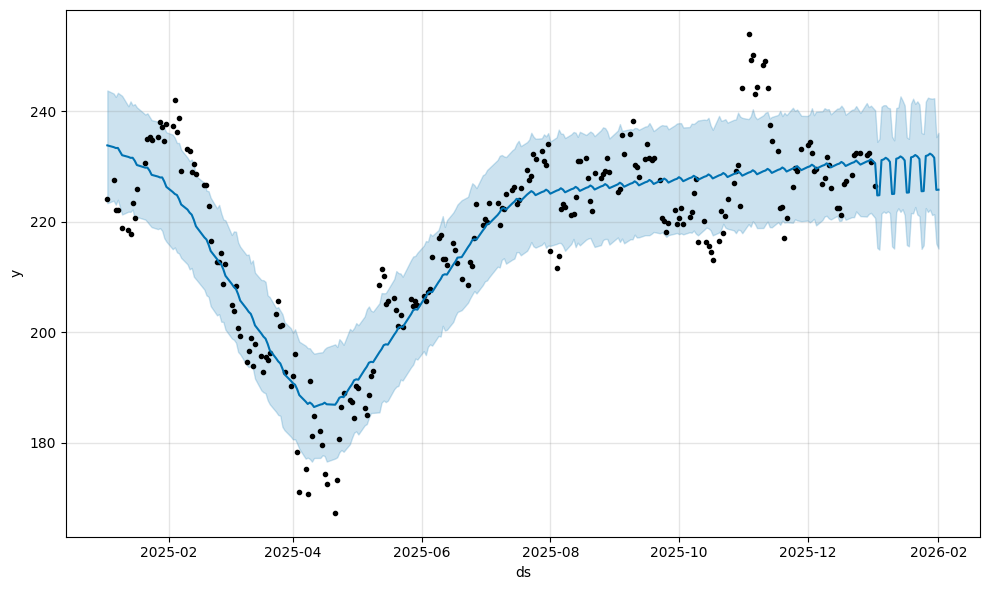

In [ ]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

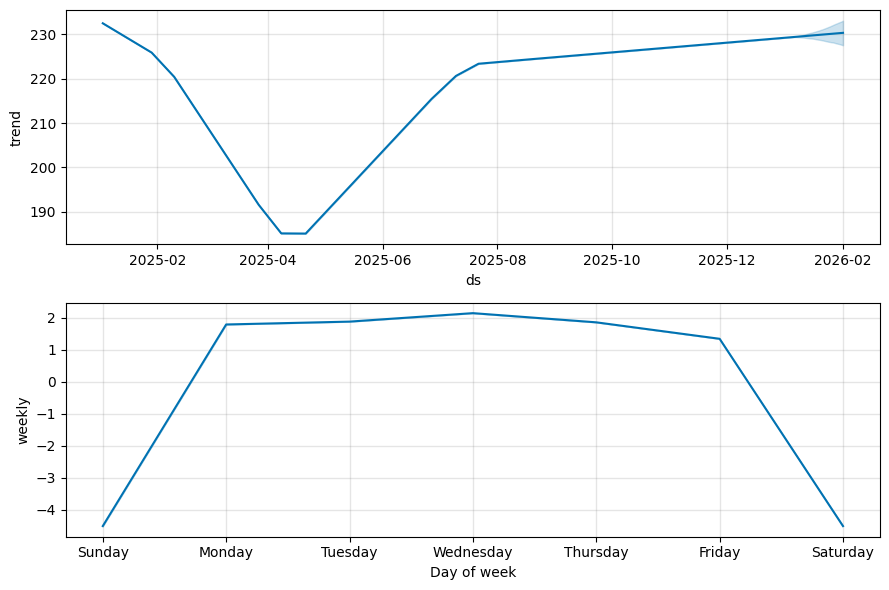

In [ ]:
figure2 = model.plot_components(forecast)

### Downloading the Forecast Data

In [ ]:
from google.colab import files
forecast.to_csv("amzn_forecast.csv")

files.download("amzn_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("AMZN.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>